In [143]:
#Import all necessary packages for python
import numpy as np
from collections import Counter, namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#Using ggplot styling
plt.style.use('ggplot')

# Types of Duplicate Values:
Duplicate Values can occur in three formats in a dataset i.e. either they are fully duplicate, partially duplicate or near-duplicates. Let's take a look at each of these:

## Fully Duplicate Values:
Fully Duplicate Values are duplicate values in which all the fields of the record are the same as that of some other record i.e. there are multiple head-to-toe copies of the same record in the dataset. Fully Duplicate Values are easy to identify and eliminate as we will see later. 

### Example:
The records 1 and 3 for the given dataset are example of fully duplicate values:

|ID|Name|Email|Phone No.|
|-|-|-|-|
|001|John Smith|johnsmith@email.com|555-555-5555|
|002|Jane Doe|janedoe@email.com|234-234-2342|
|003|John Smith|johnsmith@email.com|555-555-5555|

## Partial Duplicate Values:
Partial Duplicate Values are duplicate values in which some of the fields of the record are the same as that of some other record, in such a manner that it induces non-uniqueness for a unique field in the dataset. By non-uniqueness of a unique field, I mean that given that we know something is unique and can only represent a single record in the dataset, yet it is repeated multiple times for some record, indicating a presence of duplicate value.

### Example:
The records 1 and 3 for the given dataset are example of partial duplicates but the same cannot be said for records 4 and 5:

|ID|Name|Seat No.|Subject|Marks|
|-|-|-|-|-|
|001|John Smith|X-042|Mathematics|87|
|002|Jane Doe|X-038|English|67|
|003|Jack Smith|X-042|Physics|92|
|004|Jane Doe|X-038|Mathematics|93|

Here, 1 and 3 are partial duplicates as we know that the seat number assigned to a given student is unique in nature. But as the case stands, we can see that two students "John Smith" and "Jack Smith" have the same seat number and thus indicate that some sort of duplication was involved. Since we can see that there is only a difference of names, we say that the records are partial duplicates of each other.

For records 2 and 4, the same cannot be said as they do have the same name and seat number and thus are perfectly valid records.

One might ask, well why didn't we count the fact that English and Physics was present as two different values for the same record? The reason is that duplicates work on the basis of uniqueness of a unique identifier but in our case Subject and Marks can be assigned multiple values to the same student and thus are non-unique in nature. Even if we had 10 more subjects for the same name and seat no., we would still consider the dataset valid for usage.

## Near Duplicates (Fuzzy Duplicates):
Near Duplicates are duplicate records that are either partial or fully duplicates but with some minor changes in the field values. This means that the record represents the same entity but due to some misspellings, typos or certain variations, these are stored and displayed as seperate records. Due to this reason, detection and elimination of near duplicates is a little bit more complicated as compared to fully and partial records. More the reason we will deal with it in a seperate notebook.

### Example:
The records 1 and 3 in the given dataset are example of near duplicates or fuzzy duplicates:

|ID|Player|Club Name|Goals|
|-|-|-|-|
|001|Lionel Messi|Barcelona|19|
|002|Cristiano Ronaldo|Real Madrid|19|
|003|Lyonel Messi|Barcelona|19|

These records are near duplicates as if we correct the type in record 3 from "Lyonel" to "Lionel", it will become a full duplicate value. Thus, the first step is to remove typos and then remove fully and partial duplicates. For this notebook though, I am just going to go over the visualization and handling techniques for fully and partial duplicates.

# Measures for Full-Duplicate Values:
First, lets see the different methods available for identifying and removing full duplicate values from a dataset. Before we start, lets load up a dataset containing fully duplicate values. For easy of use, I have used the a sample dataset as an example usecase:

In [144]:
#Loading the fully duplicate dataset from the sample datasets
sample_df = pd.read_csv("./sample datasets/full-duplicates.csv", index_col=0)

#Viewing the contents of the sample dataset
sample_df.head()

,first_name,last_name,age,gpa
0,Emma,Moore,24,3.82
1,Joshua,Miller,24,3.12
2,Isabella,Wilson,25,3.36
3,Ethan,Brown,22,3.47
4,Emma,Moore,24,3.82


## Mining Full Duplicates in a Dataset:
To identify whether there are full duplicates present in a given dataset, we will make use of data mining to find the occurence of each record. If it is present more than once, we can assign the later one and the ones to come as duplicates of the first record. Lets see the various techniques through which we can determine this:

### Using a custom approach:
Although it may seem as a task that has already been programmed in some library or package, it is always a good idea to look into the custom implementation of some method. The first approach we are going to use is just that. We are going to generate a simple method to keep track of how many duplicate values are present and then provide the result in number of duplicates found 

In [145]:
#Defining the custom method for finding full duplicates
def find_full_duplicates(df):
    #Initialzie dictionary for duplicates
    unique = set()
    duplicates = 0
    
    #Iterate through all records and maintain list of indices for each duplicate
    for idx in df.index:
        item = tuple(df.iloc[idx])
        if item not in unique:
            unique.add(item)
        else:
            duplicates += 1
    #Return result as the number of duplicates
    return duplicates 

#Checking the number of duplicates for the sample dataframe
find_full_duplicates(sample_df)

22

Although this approach isn't the best one out there, it gives us a custom implementation of how simple it is to find full duplicates in a dataset i.e. we have to keep in check the unique records and if something is already present in the hash set storing those records, we increment the duplicates count. We could have also stored the indices of these rows instead, but this was just to illustrate the concept of finding duplicate values, nothing more. Other possible approaches would have been generating hash for each record and comparing the hashes but that would have been computationally expensive.

### Using pandas:
Pandas being a highly used data analysis library provides methods to determine and eliminate duplicate values. One such method for identification of duplicate values is duplicated(). The method provides us with a list of boolean outputs of whether a given record is a duplicate or not. To make the result meaningful, we have to add all the values based on the boolean output i.e. True or False. Lets check out its implementation on the dataset example and see what it returns in result:

In [146]:
#Function that returns the number of full duplicate values for a dataframe
def get_full_duplicates(df):
    duplicates = df.duplicated().sum()
    return duplicates

#Applying the method to the sample dataframe
get_full_duplicates(sample_df)

22

## Visualizing Full Duplicates:
Once full duplicate values have been found, we can use visualization techniques to display the rows or pattern where duplicate values are present. This usually allows others to get a good insight of the status of duplicate values in the given dataset. Lets see different techniques that allow us to visualize full duplicates in a dataset.

### Count Plot:
The simplest way to plot out the number of duplicates is to compare them with the total non-duplicate values in a dataset. This can be done by simply collecting the total number of duplicates and then plotting it with the total records that aren't duplicates. I have used matplotlib to get the desired result (using a bar chart with counts):

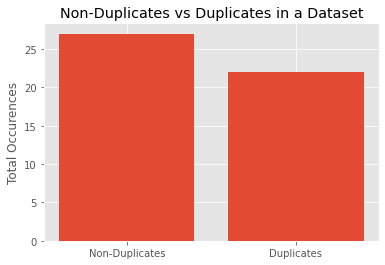

In [147]:
#Visualizing results for count of duplicates and non-duplicates
duplicates = get_full_duplicates(sample_df)
non_duplicates = len(sample_df) - duplicates

plt.bar([0,1], [non_duplicates, duplicates])
plt.xticks([0,1], ['Non-Duplicates', 'Duplicates'])
plt.ylabel("Total Occurences")
plt.title("Non-Duplicates vs Duplicates in a Dataset")
plt.show()

As we can see, count plot although offers the comparison between duplicates and non-duplicate rows but doesn't really provide a good result in cases like these where the dataset has so many non-duplicates in comparison to duplicates i.e. it only works in case of small datasets.

### Pie-Chart:
Pie-Chart is another method of visualizing results. Since we know that the result for duplicates and non-duplicates would contain only two categories in the result, pie-chart can serve as a very good option due to its limited and fixed porportions. I have used matplotlib to implement the pie chart:

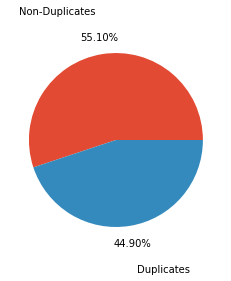

In [148]:
#Visualizing results for duplicate records as pie chart
plt.pie([non_duplicates, duplicates], labels=['Non-Duplicates', 'Duplicates'], autopct='%1.2f%%', pctdistance=1.2, labeldistance=1.5)
plt.show()

Although count plot as well as pie chart give us a good representation of how much percentage of duplicates are present in comparison to non-duplicates, it doesn't provide us with the patterns hidden for duplicates. Thus, we now look at techniques that not only give us insight about the number of duplicates but also the patterns in which they are hidden in the dataset. 

### Prominent Line Chart:
The first approach I am going to use for this case is to iterate over the different duplicates in the dataset and generate a single prominent solid line if the record is a duplicate. This allows us to visualize the dataset in the way it was provided i.e. index form and also enables us to determine the patterns in which the duplicate values are present in the dataset. Let's see this in action:

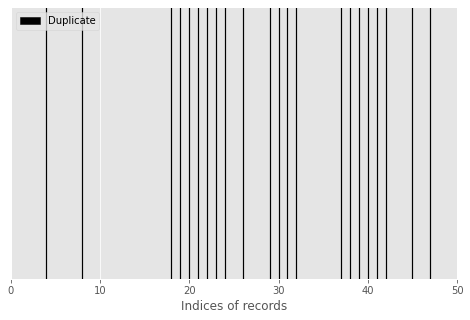

In [149]:
#Filter duplicate rows from the data using pandas
duplicates = sample_df[sample_df.duplicated()]

# Generating the prominent duplicates
fig, ax = plt.subplots(figsize=(8,5))

for row in duplicates.index:
    ax.axvline(row, color='black', linewidth=1.2)

ax.set_xticks([])
ax.set_xticks(range(0,len(sample_df)+2,10))
ax.set_xlabel('Indices of records')
ax.set_yticks([])

#Adding custom legend for duplicates
duplicates_label = mpatches.Patch(color='black', label='Duplicate')
plt.legend(handles=[duplicates_label], loc='upper left')

# Show the plot
plt.show()

Here we can see that the plot highlighted out the indices where there is duplicate value and where there isn't. The duplicate values are highlighted with black whereas non-duplicates are grey. This chart is usually helpful for tons of data, which allows us to get an insight as to whether the values duplicated were placed randomly or in process of copy paste, etc.

### Frequency Chart:
Another approach to display the patterns is to find the number of duplicate rows per each attribute or record. This is done with the help of frequeny chart which comprises of two steps: 1) Create a counter dictionary to store the number of occurrences of each record 2) Use a bar chart to display each key value with its frequency in the data. This allows us to understand which records were repeated the most or if there are any patterns hidden. Lets see an example of this on our sample dataset:

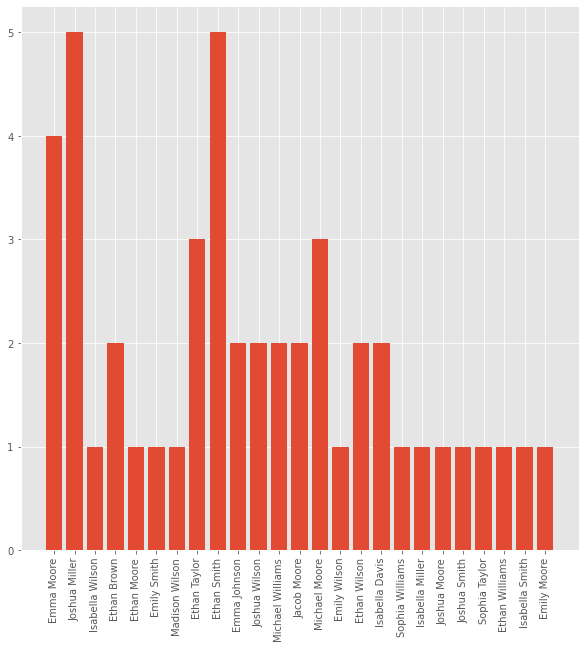

In [150]:
counter = Counter([tuple(sample_df.iloc[idx]) for idx in range(len(sample_df))])

labels = [' '.join(y for y in x[:2]) for x in counter.keys()]
count = [x for x in counter.values()]

plt.figure(figsize=(10,10))
plt.bar(labels, count)
plt.xticks(rotation=90)
plt.show()

## Dealing with Full Duplicates:
Full Duplicates are generally values that are just repetitive in nature and in any case do not represent anything but extra records of data. However, there are still some cases where full duplicates need not to be removed for extra information.

### Eliminating Duplicates:
The most commonly used approach to deal with full duplicates is to remove them from the dataset. This is because in most cases the full duplicates don't carry any value and are just records occurring due to some kind of error or mistake, leading to inefficiency in analysis and prediction. The common way of eliminating duplicates is via the use of  drop_duplicates() method in pandas library as indicated by the code below:

In [151]:
#Dropping full duplicates from the sample dataset to generate a new dataset
new_sample_df = sample_df.drop_duplicates()

#Always reset your index after dropping records (if default index is being used)
new_sample_df.reset_index(inplace=True, drop=True)

#Viewing contents of the new and cleaned sample
new_sample_df.head()

,first_name,last_name,age,gpa
0,Emma,Moore,24,3.82
1,Joshua,Miller,24,3.12
2,Isabella,Wilson,25,3.36
3,Ethan,Brown,22,3.47
4,Ethan,Moore,22,3.30


### Keeping Full Duplicates:
As akward as it sounds, full duplicates are also kept in the datasets in some use cases. A common use case of this is survey forms where on multiple entries of the same survey, one can analyze the information and make sure to check if its authentic for every single submission. There are some more cases but in comparison to elimination are very few and hence often elimination is the key to getting a more accurate analysis as well as prediction.

# Measures for Partial Duplicate Values:
Partial Duplicates are special types of duplicate values in which we have a set of fields the same as that of some previous record, but with the exception of one or more unique properties, which identify a record as a unique entry in the dataset.

## Mining Partial Duplicates in a Dataset:
Before we start mining out partial duplicates from a dataset, its better to first understand what classifies as partial duplicate and what doesn't. Lets consider the following table where we have a student table with some records:

|No.|ID|Student Name|Email|Subject|Marks|
|-|-|-|-|-|-|
|1|001|John Smith|johnsmith@email.com|Mathematics|57|
|2|002|John Smith|johnsmith@email.com|English|65|
|3|003|Jane Doe|janedoe@email.com|Chemistry|85|
|4|003|Jane Wilson|janedoe@email.com|Physics|75|
|5|004|Jane Wilson|janewilson@email.com|Chemistry|93|
|6|001|John Smith|johnsmith@email.com|Mathematics|84|
|7|004|Jane Wilson|janiewilson@email.com|Computer|73|
|8|001|John Smith|johnsmith@email.com|Chemistry|57|

Now lets thouroughly go through which of these are partial duplicates and which ones aren't:

* Record 1 and 2 are partial duplicates as both students have the same name "John Smith" and email "johnsmith@email.com" but different student IDs "001" and "002", which cannot be possible as student IDs are unique in nature. Thus record 2 would be considered a partial duplicate of record 1.


* Record 3 and 4 are partial duplicates as both students have the same ID "003" as well as the email "janedoe@email.com" but have different names, which cannot be possible as the same student cannot be registered with two different names in the same dataset. Even if we consider name as non-unique, this would still be a wrong practice.


* Record 5 and 7 are partial duplicates as both students have the same ID "004" and name "Jane Wilson" but different emails, which cannot be possible as the same student cannot be registered with two different emails for the same dataset. In some cases, this may not be considered a partial duplicate since students are allowed to access the university's content through different emails but usually this practice is not followed.


* Record 1 and 6 are partial duplicates as both students have the same ID "001", same name "John Smith" and same email "johnsmith@email.com" but we already have had one record for the subject of Mathematics for John Smith. These records being partial duplicates depends on the case. If the score for different tests is being recorded in the same registry than it might be possible for this to be a non-duplicate but here , this isn't the case.


* Record 8 is a valid record even if it has marks "57" for the id "001", name "John Smith" and email "johnsmith@email.com", even if John Smith has already scored 57 marks in Mathematics. This is because marks are non-unique in nature and hence it doesn't matter if the same person gains the same marks in different subjects, the record would still be considered eligible.

### Unique vs Non-Unique Identification:
Thus, we can say that the main and foremost step of eliminating or handling partial duplicates is to understand which of the attributes are acting as unique and which are non-unique. Understanding this correlates directly with understanding the underlying problem statement for the task e.g. in the above case, we could have have some exceptions for the classified partial duplicates as follows:

* Assuming that the dataset is a record of student information log i.e. if some student in the admin undergoes some process to update his information such as name or email, and that gets stored into the dataset, then most of the above cases would have been treated as valid records as a name and email can be changed by the student if he undergoes the changing process (since that process is not mentioned here nor is some variable related to it, we say that it is a possbility)


* Assuming that the dataset stores the record of student information across different terms and tests and assignments in a single place e.g. if a student gives a test in Mathematics subject and gains 15 marks out of 20, it gets stored in the dataset. Later, he gives another test but this time scores 12 out of 20, then the new record won't be treated as a duplicate like in our case, rather it would be considered a new value. 


* Assuming that the dataset is of all students in the university i.e. the same student ID can be assigned to students of two different departments, which obvious have different names and emails, and still the dataset would consider it a valid record. This is because IDs are commonly given on a department level. To ensure partial duplicates in such case, something like department name must be mentioned in the table as well.

Thus, from the above observations, we can say that to identify a partial duplicate, we have to first identify the unique variables (in our case, email, ID, name) for the problem at hand as well as the sub-unique variables (in our case Subject) at each layer. Once identified, we just have to repeat the process of full duplicate values to get our result.

### Using pandas:
The most common way of determining partial records is with the help of pandas duplicated() method with a subset argument. This works by setting the value of the unique identifiers in the dataset as the argument value. Thus, the method identifies based on these unique identifiers that a particular record is duplicate or not, rather than checking all the attributes like in case of full duplicates. Lets apply this method on another one of our sample datasets to check the results:

In [152]:
#Loading the sample dataset for partial duplicates
sample_df = pd.read_csv("./sample datasets/partial-duplicates.csv")

#Viewing the contents of the dataset
sample_df.head()

,ID,Student Name,Email,Subject,Marks
0,1,John Smith,johnsmith@email.com,Mathematics,57
1,2,John Smith,johnsmith@email.com,Chemistry,65
2,3,Jane Doe,janedoe@email.com,Chemistry,85
3,3,Jane Doe,janedoe@email.com,Physics,75
4,4,Jane Wilson,janewilson@email.com,Chemistry,93


Now for our use case, we are considering the ID, student name and email as the unique values, so that what we will use for as a subset to determine if a record is a duplicate or not. The process of finding partial duplicates isn't simple though, since we have to apply it on each granular scale to determine if the records are in accordance with the data or not. In our case, the first record for a particular student's subject is considered the correct one and thus should be used to map the correct value in place of its partial duplicate (e.g. a student with id 001 and email student@email.com, if appears again with some different id or email, then we will use the first record to map the correct values to it).

The basic method to deal with such a situtation is to first collect the data that we consider is accurate on a unique level and filtering that data out so that we can make decisions for remaining data from it. In our case, since we consider the first record for a student to potray his actual details, we can say that we have to store the first ID and Email for every student in the dataset and later if some student matches one of these values, but doesn't match the other, it will be deemed as a partial duplicate. So lets start this process

In [153]:
#Dictionary to store unique records for each student
unique_records = {}

#Using boolean indexing to filter out the unqiue (id, email) pairs for every student
unique_ids = sample_df[~sample_df.duplicated(subset='ID', keep='first')]
unique_students = unique_ids[~unique_ids.duplicated(subset='Email', keep='first')]

#Iterate over the filtered dataframe to get the values for each student
for index, row in unique_students.iterrows():
    id_email = (row['ID'], row['Email'])
    if id_email not in unique_records.keys():
        unique_records[id_email] = row['Student Name']
        
unique_records

{(1, 'johnsmith@email.com'): 'John Smith',
 (3, 'janedoe@email.com'): 'Jane Doe',
 (4, 'janewilson@email.com'): 'Jane Wilson',
 (5, 'jackwhite@email.com'): 'Jack White'}

In [154]:
#Using the obtained student records to find if a given row is a partial duplicate or not
relevant = []
for idx, row in sample_df.iterrows():
    id_email = (row['ID'], row['Email'])
    if id_email in unique_records:
        if unique_records[id_email] == row['Student Name']:
            relevant.append(idx)
        
#Checking out the relevant records only
relevant_df = sample_df[sample_df.index.isin(relevant)]
relevant_df

,ID,Student Name,Email,Subject,Marks
0,1,John Smith,johnsmith@email.com,Mathematics,57
2,3,Jane Doe,janedoe@email.com,Chemistry,85
3,3,Jane Doe,janedoe@email.com,Physics,75
4,4,Jane Wilson,janewilson@email.com,Chemistry,93
5,1,John Smith,johnsmith@email.com,Mathematics,84
7,1,John Smith,johnsmith@email.com,Chemistry,57
8,5,Jack White,jackwhite@email.com,Physics,84
9,4,Jane Wilson,janewilson@email.com,Physics,87
10,1,John Smith,johnsmith@email.com,Physics,74
11,3,Jane Doe,janedoe@email.com,Mathematics,72


The above obtained records are all those records which are valid in nature as per our requirement and can be further analyzed to get the desired results. On the other hand, the rows which were removed are ones that can undergo some processing to regain their value (though this is not always the case). Lets check the irrelevant ones first

In [155]:
#Checking out the irrelevant rows
sample_df[~sample_df.index.isin(relevant)]

,ID,Student Name,Email,Subject,Marks
1,2,John Smith,johnsmith@email.com,Chemistry,65
6,4,Jane Wilson,janiewilson@email.com,Mathematics,73
13,4,Jane Williams,janewilson@email.com,Physics,82
14,5,Jack Smith,jackwhite@email.com,Mathematics,92


In our case as you can see there is a pretty minor error in these records which can be removed if necessary with the help of a simple function, but we won't be going into that right now. Lets perform the final step to ensure which of the values aren't partial duplicates by ensuring a check on the subjects

In [156]:
#Applying duplicate subset on Subject for each Student to filter out all duplicates
relevant_df[~relevant_df.duplicated(subset=['ID', 'Student Name', 'Email', 'Subject'])]

,ID,Student Name,Email,Subject,Marks
0,1,John Smith,johnsmith@email.com,Mathematics,57
2,3,Jane Doe,janedoe@email.com,Chemistry,85
3,3,Jane Doe,janedoe@email.com,Physics,75
4,4,Jane Wilson,janewilson@email.com,Chemistry,93
7,1,John Smith,johnsmith@email.com,Chemistry,57
8,5,Jack White,jackwhite@email.com,Physics,84
9,4,Jane Wilson,janewilson@email.com,Physics,87
10,1,John Smith,johnsmith@email.com,Physics,74
11,3,Jane Doe,janedoe@email.com,Mathematics,72
12,5,Jack White,jackwhite@email.com,Chemistry,82


In [157]:
#Extracting the index for the relevant values to generate only partial duplicates
relevant_indices = relevant_df.index
partial_duplicates = sample_df[~sample_df.index.isin(relevant_indices)]
partial_duplicates

,ID,Student Name,Email,Subject,Marks
1,2,John Smith,johnsmith@email.com,Chemistry,65
6,4,Jane Wilson,janiewilson@email.com,Mathematics,73
13,4,Jane Williams,janewilson@email.com,Physics,82
14,5,Jack Smith,jackwhite@email.com,Mathematics,92


These values above indicate the partial duplicates present in the dataset according to our case scenario. It must once again be reminded that partial duplicates depend on the context of the problem unlike full duplicates which are exact copy of the same record. Partial duplicates depend on the uniqueness property of attributes which identify a record in the provided dataset. Since our use case was concerned with obtaining the first value stored for each student and had some constraints implemented, thus, it had to go through some rough steps before getting the answer. In general, we learned about two techniques from this analysis of partial duplicates:

### Filter Chain on Unique Attributes:
When there are certain factors on which your records depend and they carry uniqueness property, the first and foremost thing to check is the validity of those records and how your problem is designed to store them. For example, in our case example the first record for email and ID was supposed to be kept so we made sure it did that. In some other system, lets say sales dataset, it might be the case that only the latest prices for the sales be required, then we would have to establish uniqueness on the last record entered, etc. 

In case there are more than one unique attributes, it can be the case that one of them is potrayed correctly while other is wrong. In simpler cases, like the ones we looked at, it was pretty easy to establish the relationship between these. But in a more complex approach and set of features, we have to perform a chain of filters. We apply deduplication per each attribute and keep non-duplicates for it and pass the resultant to be deduplicated by the next attribute. This process continues till all the attributes have successfully filtered out duplicates. Finally all the attributes are collectively used to store the records in a datastructure and iterated over the dataset to filter out the partial duplicates corrupting the dataset.

### Unique Subset Filtering:
In cases where there isn't much complex patterns, the unique keys of the dataset aren't repeated by mistake, but other non-unique attributes might. This results in performing filtering of duplicates on the basis of those unique keys. This approach is quite simple and can be used at easy to filter out the partial duplicates for the defined subset.

## Visualizing Partial Duplicates:
Visualization of Partial Duplicates depends on the process we used to identify them. As in our case, we can't typically write a program directly to get the visualizations as a number of factors were involved in determining the true records. Thus, here i'm not gonna spend much time on it and simply generate two graphs, one representing the total counts and other representing the pattern hidden as I did for the case of full duplicates

### Count Plot:
The first simple thing we can do with our collected information is generate a count plot. This can be done simply by providing the chart with the number of partial duplicates we extracted and subtracting it from total records to get number of non-duplicate items as illustrated

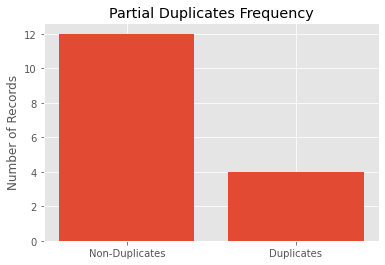

In [158]:
#Determining the number of duplicates and non-duplicates
non_duplicates = len(sample_df) - len(partial_duplicates)

#Visualizing count plot
plt.bar([0,1], [non_duplicates, len(partial_duplicates)])
plt.xticks([0,1], labels=['Non-Duplicates', 'Duplicates'])
plt.ylabel("Number of Records")
plt.title("Partial Duplicates Frequency")
plt.show()

### Partial Duplicate Pattern:
In this one, I am going to make use of the indices obtained for the partial duplicates and use them to draw line patterns for their occurrences. This will give an insight on where the duplicate values are located and the pattern they represent

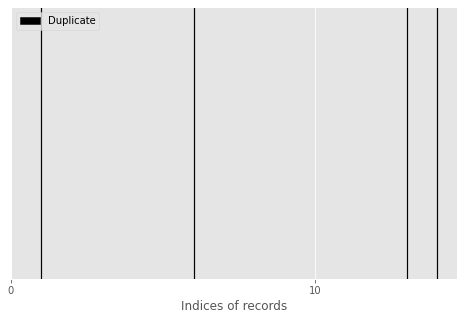

In [159]:
# Generating the prominent duplicates
fig, ax = plt.subplots(figsize=(8,5))

for row in partial_duplicates.index:
    ax.axvline(row, color='black', linewidth=1.2)

ax.set_xticks([])
ax.set_xticks(range(0,len(sample_df)+2,10))
ax.set_xlabel('Indices of records')
ax.set_yticks([])

#Adding custom legend for duplicates
duplicates_label = mpatches.Patch(color='black', label='Duplicate')
plt.legend(handles=[duplicates_label], loc='upper left')

# Show the plot
plt.show()

The use case we are dealing with is a sample dataset, the reason we have so few lines and partial duplicates, but when done on a large dataset, these tend to provide a good insight on whether the results were copy pasted i.e. on purpose or just by chance due to randomness of generation. It is to be noted that for a simpler data i.e. with just unique attribute selection for deduplication, we could have used clustering, pivot tables and other techniques as well but since it requires some preprocessing and understanding of the problem before applying the approaches, thus, I have not used them and rather kept the results obtained previously to visualize the outcome

## Handling Partial Duplicates:
Partial Duplicates can be handled in two ways just like full duplicates depending on the type of data involved. Usually, just like full duplicates, these are removed from the dataset using the drop_duplicates() method with the subset argument. Obviously, we need to always learn the patterns first and find out which records are actually partial duplicates, like I showed you in the data mining process. Here, I will use the obtained relevant data and perform the relevant method to remove duplicates from it (There aren't any methods available for uniqueness filter since it entirely depends on the nature of the problem and its requirements)

In [160]:
#Removing partial duplicates from relevant data to get final results
clean_df = relevant_df.drop_duplicates(subset=['ID', 'Student Name', 'Email', 'Subject'], keep='first')
clean_df

,ID,Student Name,Email,Subject,Marks
0,1,John Smith,johnsmith@email.com,Mathematics,57
2,3,Jane Doe,janedoe@email.com,Chemistry,85
3,3,Jane Doe,janedoe@email.com,Physics,75
4,4,Jane Wilson,janewilson@email.com,Chemistry,93
7,1,John Smith,johnsmith@email.com,Chemistry,57
8,5,Jack White,jackwhite@email.com,Physics,84
9,4,Jane Wilson,janewilson@email.com,Physics,87
10,1,John Smith,johnsmith@email.com,Physics,74
11,3,Jane Doe,janedoe@email.com,Mathematics,72
12,5,Jack White,jackwhite@email.com,Chemistry,82


Thats it for today! This notebook was generated through a detail oriented process, so it would take time to understand some of its details especially if you are a research oriented person. For me, it was an experience worth 3 days. Hopefully the next topics to come are going to be detail oriented as well and may not take 1 day to complete as was the case with the previous notebooks.